In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_colwidth = 200

### Oxford University COVID-19 forecasting project data

The data below was downloaded from the [Oxford University countermeasures database](https://www.notion.so/COVID-19-countermeasures-database-b532a58d6f944ef6982ab565627bdb08). See the website for a description of the data sources.

In [3]:
countermeasures_df = pd.read_csv("data/containment_measures_march23.csv")

In [4]:
countermeasures_df.head(1)

,ID,Applies To,Country,Date Start,Date end intended,Description of measure implemented,Exceptions,Implementing City,Implementing State/Province,Keywords,Quantity,Source,Target city,Target country,Target region,Target state
0,163,NaN,Austria,"Mar 16, 2020",NaN,On 10 March 2020 government announced that all universities will close their classes at the latest by 16 March.,NaN,NaN,NaN,university closure,NaN,https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Austria,NaN,NaN,NaN,NaN


In [5]:
countermeasures_df[["Country", "Date Start", "Description of measure implemented"]].groupby("Country").head(10)

,Country,Date Start,Description of measure implemented
0,Austria,"Mar 16, 2020",On 10 March 2020 government announced that all universities will close their classes at the latest by 16 March.
1,Germany,"Feb 01, 2020","102 German citizens and 26 relatives, all of whom were symptom-free on departure, were evacuated from the Wuhan region to Frankfurt am Main by the Executive Transport Wing of the German Air Force...."
2,United Kingdom,"Mar 20, 2020","All schools, nurseries and colleges closed."
3,United Kingdom,"Mar 16, 2020","If one person in any household has a persistent cough or fever, everyone living there must stay at home for 14 days"
4,United Kingdom,"Mar 16, 2020","By the weekend, those with the most serious health conditions must be ""largely shielded from social contact for around 12 weeks"""
...,...,...,...
1028,US: Indiana,"Mar 25, 2020",All public and private gatherings of any number of people occurring outside a single household or living unit are prohibited
1029,NaN,NaN,NaN
1030,NaN,NaN,NaN
1031,NaN,NaN,NaN


In [6]:
print(countermeasures_df["Country"].unique())

['Austria' 'Germany' 'United Kingdom' 'Vietnam' 'South Korea' 'Singapore'
 'Israel' 'Japan' 'Sweden' 'San Marino' 'Hong Kong' 'Taiwan' 'Macau'
 'China' 'United States' nan 'Thailand' 'Italy' 'Czechia' 'Australia'
 'Trinidad and Tobago' 'Qatar' 'North Korea' 'New Zealand' 'Colombia'
 'France' 'Romania' 'Portugal' 'Spain' 'Belgium' 'Luxembourg' 'Albania'
 'Andorra' 'Azerbaijan' 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria'
 'Estonia' 'Denmark' 'Cyprus' 'Croatia' 'Finland' 'Georgia' 'Hungary'
 'Latvia' 'Lithuania' 'Moldova' 'Greece' 'Malta' 'Monaco' 'Netherlands'
 'Iceland' 'Guernsey' 'Macedonia' 'Ireland' 'Vatican City' 'Jersey'
 'Kosovo' 'Kazakhstan' 'US: Florida' 'Ukraine' 'Turkey' 'Poland'
 'Slovakia' 'Serbia' 'Slovenia' 'Switzerland' 'Montenegro' 'Norway' 'Iran'
 'Liechtenstein' 'Russia' 'US:N Carolina' 'US: Oregon' 'US: Arizona'
 'US:California' 'US:Idaho' 'US: Nevada' 'US:Utah' 'US:Washington'
 'US: S Carolina' 'Mexico' 'Egypt' 'Malaysia' 'US:Georgia' 'US:Maryland'
 'US: Indiana' '

In [7]:
print(countermeasures_df["Implementing City"].unique())

[nan 'Danang' 'Seoul' 'Wuhan' 'Beijing, Shenzhen' 'Washington DC'
 'Huanggang' 'Huanggong' 'Wenzhou' 'Beijing' 'Shenzhen' 'Bangkok' 'Tokyo'
 'Jingmen' 'Nanjing, Suzhou' 'Xiaogan' 'Hangzhou'
 'Yiwu International Trade City' 'Dalian, Qingdao, Shenyang, Weihai'
 'Yantai' 'Madrid' 'La Gomera' 'Valencia' 'Sevilla' 'Barcelona' 'Paris'
 'Vitoria-Gasteiz' 'Banja Luka'
 'Banja Luka, Doboj, Mrkonjić Grad, Prnjavor, Čelinac' 'Sofia' 'Budapest'
 'Miskolc' 'Budapest, Kaposvár, Miskolc, Szeged, Székesfehérvár'
 'Vatican City' 'San Francisco' 'Moscow'
 'Bertonico, Casalpusterlengo, Castelgerundo, Castiglione d’Adda, Codogno, Fombio, Maleo, San Fiorano, Somaglia, Terranova, Vò'
 'Naples, Palermo' 'Taranto' 'Messina' 'Medicina' 'Ischgl' 'Bansko']


In [8]:
print(countermeasures_df["Implementing State/Province"].unique())

[nan 'Quang Ninh' 'Gyeongbook Province' 'Daegu, Gyeongbook Province'
 'Busan' 'Hubei' 'Hunan' 'Tianjin' 'Zheijang' 'Meituan' 'Chongqing'
 'Zhejian' 'Shanghai' 'Sichuan' 'Jiangsu' 'Guangdong' 'Hangzhou'
 'Shenzhen' 'Leishenshan' 'Guangzhou' 'Kanagawa prefecture' 'Guangxi'
 'Guizhou' 'Huanggang' 'Henan, Shandong' 'Liaoning, Shandong' 'Shandong'
 'Madrid' 'Tyrol' 'Basque Country' 'Galicia' 'Republika Srpska' 'Bosnia'
 'Autonomous Region of Madeira' 'California' 'Leningrad Oblast'
 'Moscow Oblast' 'St. Petersburg Oblast' 'Santa Clara County' 'Seattle'
 'Berkley, Countra Costa Country, Santa Clara County, los Angles'
 'Orange County' 'Placer County, San Mateo County, Sonoma County'
 'San Benito County, Santa Clara County'
 'Kershan County, Lancaster County' 'Bavaria' 'Colima' 'Mexico City'
 'South Fulton' 'Atalanta, Brookhaven, Clarkston, Dunwoody' 'Atalanta'
 'Albany, Athens-Clark county, Bosnia, Dougherty County'
 'Gyeonggi-Province, Paju' 'Gyeonggi-Province, Seoul'
 'Farifax county, Loud

### John Hopkins containment measures database

The data is made available as part of the John Hopkins [Containment Measures Database](http://epidemicforecasting.org/containment). See the website in the link for a description of the data sources.

In [9]:
containment_df = pd.read_csv("data/countermeasures_db_johnshopkins_2020_03_30.csv")

In [10]:
containment_df.columns

Index(['Unnamed: 0', 'Symptomatic isolation - targeted',
       'Symptomatic isolation - blanket', 'Asymptomatic isolation - targeted',
       'Asymptomatic isolation - blanket', 'Domestic travel restriction',
       'International travel restriction', 'Testing', 'Contact tracing',
       'Mask wearing', 'Hand washing', 'Gatherings banned',
       'Healthcare specialisation', 'Public education and incentives',
       'Assisting people to stay home', 'Public cleaning',
       'Miscellaneous hygiene measures', 'Public interaction reduction',
       'Nonessential business suspension', 'School closure',
       'Activity cancellation', 'Resumption', 'Diagnostic criteria loosened',
       'Diagnostic criteria tightened', 'Testing criteria', 'Date', 'Country',
       'Confirmed Cases', 'Deaths'],
      dtype='object')

In [11]:
print(containment_df["Country"].unique())

['Austria' 'Germany' 'United Kingdom' 'Vietnam' 'South Korea' 'Singapore'
 'Israel' 'Japan' 'Sweden' 'San Marino' 'Slovenia' 'Canada' 'Taiwan'
 'Macau' 'Hong Kong' 'China' 'Thailand' 'Italy' 'Czechia' 'Australia'
 'Trinidad and Tobago' 'Qatar' 'New Zealand' 'Colombia' 'Romania' 'France'
 'Portugal' 'Spain' 'Belgium' 'Luxembourg' 'Albania' 'Andorra'
 'Azerbaijan' 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria' 'Denmark'
 'Estonia' 'Cyprus' 'Croatia' 'Finland' 'Georgia' 'Hungary' 'Latvia'
 'Lithuania' 'Greece' 'Moldova' 'Malta' 'Monaco' 'Netherlands' 'Iceland'
 'Ireland' 'Kosovo' 'Kazakhstan' 'Poland' 'Turkey' 'Ukraine' 'Slovakia'
 'Serbia' 'Switzerland' 'Norway' 'Montenegro' 'Iran' 'Liechtenstein'
 'Russia' 'Mexico' 'Egypt' 'Malaysia' 'Nepal' 'Afghanistan' 'Iraq'
 'Philippines' 'Kuwait' 'South Africa' 'Armenia' 'Pakistan' 'Brazil'
 'Costa Rica' 'Panama' 'India' 'Bahrain' 'United Arab Emirates'
 'Kyrgyzstan' 'Indonesia' 'Namibia' 'Uganda']


In [12]:
cases_df = containment_df[["Date", "Country", "Confirmed Cases", "Deaths"]]\
.loc[containment_df["Confirmed Cases"] > 3000]\
.pivot(index="Date", columns="Country", values="Confirmed Cases")

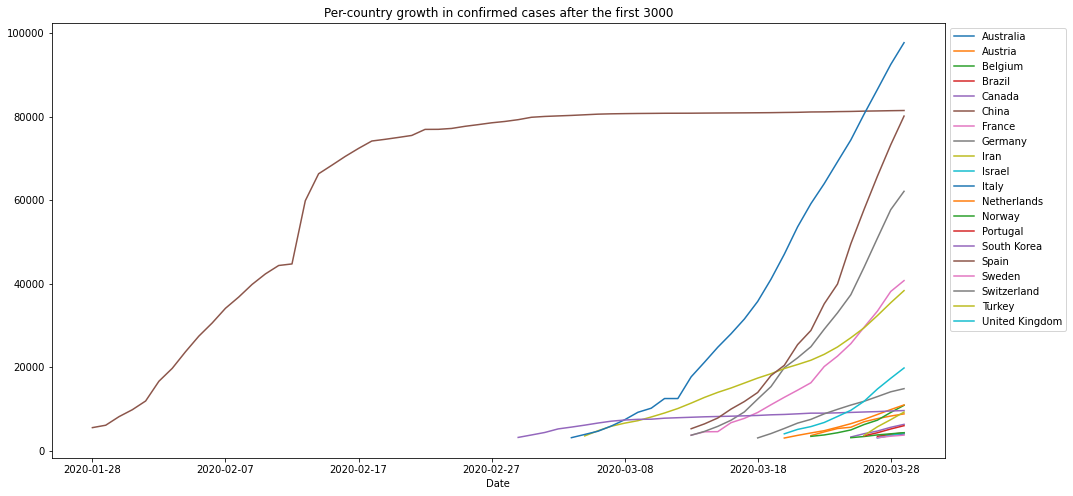

In [13]:
cases_df.plot(figsize=(16,8), title="Per-country growth in confirmed cases after the first 3000")\
.legend(bbox_to_anchor=(1,1))

In [14]:
deaths_df = containment_df[["Date", "Country", "Confirmed Cases", "Deaths"]]\
.loc[containment_df["Deaths"] > 100]\
.pivot(index="Date", columns="Country", values="Deaths")

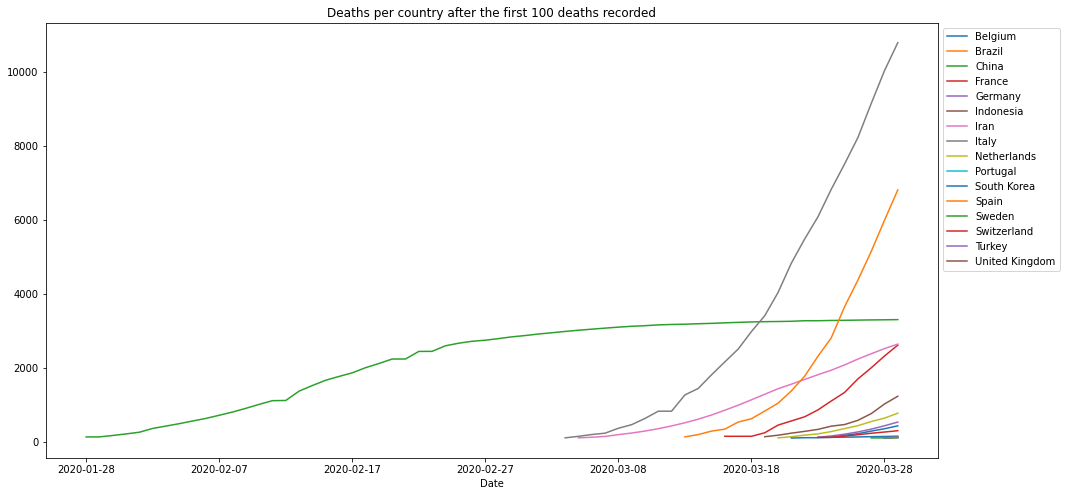

In [15]:
deaths_df.plot(figsize=(16,8), title="Deaths per country after the first 100 deaths recorded")\
.legend(bbox_to_anchor=(1,1))

In [16]:
other_cm_cols = ['Unnamed: 0', 'Resumption', 'Diagnostic criteria loosened', 'Testing criteria', 'Date', 'Country',
                 'Confirmed Cases', 'Deaths']

In [17]:
countermeasures = list(filter(lambda m: m not in other_cm_cols, containment_df.columns))

In [18]:
cm_df = containment_df[countermeasures + ['Date', 'Country']].fillna(0)

In [19]:
cm_df[countermeasures] = cm_df[countermeasures].mask(cm_df[countermeasures] > 0, 1)

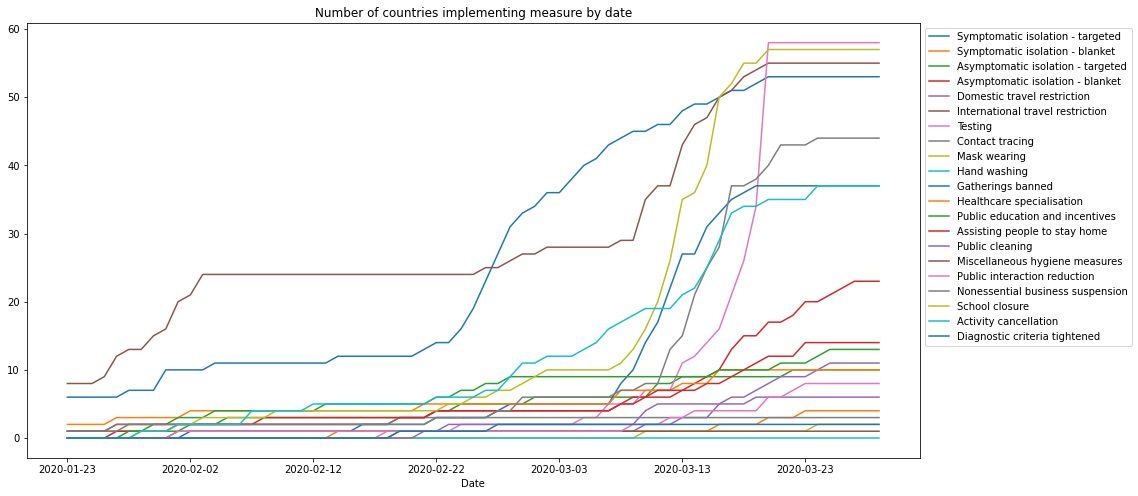

In [20]:
cm_df.groupby("Date").sum().plot(figsize=(16,8), title="Number of countries implementing measure by date")\
.legend(bbox_to_anchor=(1,1))